Using the code below, which runs `nsims` simulations and compares linear, lasso, and ridge regression, change the variable `alpha` (this is equivalent to lambda, the harshness penalty we talked about) and see how that changes the behavior of the methods. Discuss.

In [34]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

from sklearn.decomposition import PCA
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # simple TT split cv


import numpy as np

In [35]:
nsims = 1000
n = 10000
alpha = 1

In [36]:
def compare(n = 10000, alpha = 1):
    
    # Real Variables
    A = np.random.normal(0,1,n)
    E = np.random.normal(0,1,n)
    I = np.random.normal(0,1,n)
    O = np.random.normal(0,1,n)
    U = np.random.normal(0,1,n)
    Y = np.random.normal(0,1,n)
    W = np.random.normal(0,1,n)

    # Unrelated Variables
    B = np.random.normal(0,1,n)
    C = np.random.normal(0,1,n)
    D = np.random.normal(0,1,n)
    G = np.random.normal(0,1,n)
    H = np.random.normal(0,1,n)
    J = np.random.normal(0,1,n)
    K = np.random.normal(0,1,n)
    L = np.random.normal(0,1,n)
    M = np.random.normal(0,1,n)
    N = np.random.normal(0,1,n)

    # Outcome
    X = 100 + A*8.23 + E*3.48 + I*2.97 + O*5.12 + U*7.83 + Y*12.34 + W*1.38 + np.random.normal(0,15,n)


    # Data Frame
    df = pd.DataFrame({"A": A,"E": E, "I":I,"O":O,"U":U,
                       "B":B,"C":C,"D":D,"G":G,"H":H,"J":J,
                       "K":K,"L":L,"M":M,"N":N,"Y":Y,"W":W,
                       "X":X})

    feat = ["A","B","C","D","E","G","H","I","O", "U", "J","K","L","M","N", "Y","W"]

    #linear
    lr = LinearRegression()
    lr.fit(df[feat], df["X"])
    lr_co = lr.coef_

    #lasso
    lasso = Lasso(alpha = alpha/2)
    lasso.fit(df[feat], df["X"])
    lasso_co = lasso.coef_

    #ridge
    ridge = Ridge(alpha = (n*alpha)/2) #Ridge() in sklearn and #glmnet() from python use different objective functions
    #changing alpha to (n/2)*alpha forces them to optimize the SAME function
    ridge.fit(df[feat], df["X"])
    ridge_co = ridge.coef_


    conames = feat*3
    coefs = np.concatenate([lr_co,lasso_co,ridge_co])

    model = np.repeat(np.array(["Linear", "LASSO", "Ridge"]), [17, 17, 17], axis=0)

    df = pd.DataFrame({"conames": conames,
                      "coefs": coefs,
                      "model": model})


    return(df)


In [37]:
sim = compare(n = n, alpha = alpha)

for i in range(1,nsims):
    sim = sim.append(compare(n = n, alpha = alpha), ignore_index = True)
    

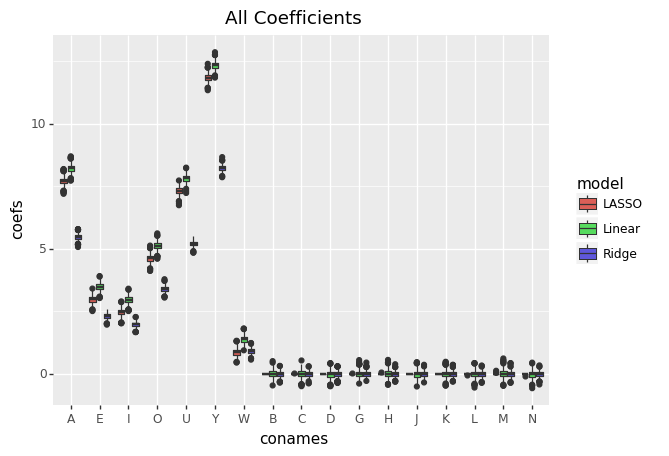

<ggplot: (316909460)>

In [38]:
#put the coefficents in order
sim["conames"] = pd.Categorical(sim["conames"], categories=["A", "E", "I", "O", "U", "Y", "W",
                                              "B","C","D","G","H","J","K","L", "M","N"])


# all
(ggplot(sim, aes(x = "conames",
                y = "coefs",
                fill = "model")) +
  geom_boxplot() + ggtitle("All Coefficients"))



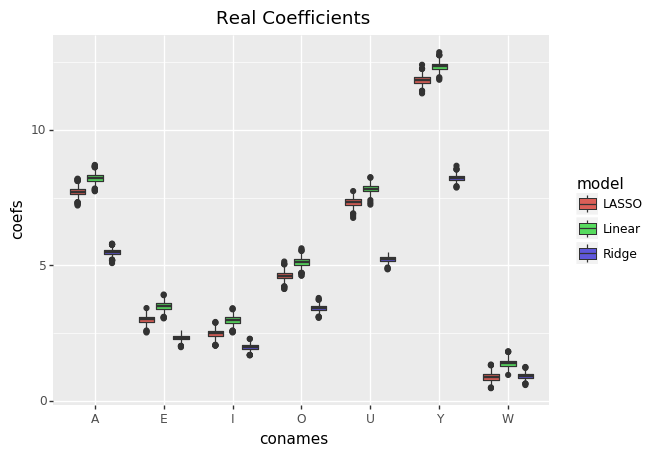

<ggplot: (314020883)>

In [39]:
#just vowels
(ggplot(sim.loc[sim['conames'].isin(["A", "E", "I", "O", "U", "Y", "W"]),]
, aes(x = "conames",
      y = "coefs",
      fill = "model")) +
  geom_boxplot() + ggtitle("Real Coefficients"))
      

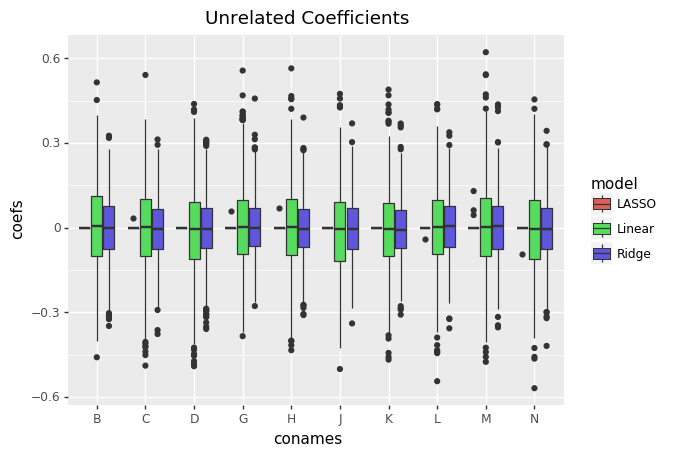

<ggplot: (316676374)>

In [40]:
#just consonants

(ggplot(sim.loc[sim['conames'].isin(["B","C","D","G","H","J","K","L", "M","N"]),],
        aes(x = "conames",
        y = "coefs",
        fill = "model")) +
  geom_boxplot() + ggtitle("Unrelated Coefficients"))